# Sanity Check Music XML conversion

Check that `midi` => `mxl` conversion indeed helps clean up the data.



## Setup


In [1]:
import os
os.chdir('../..')  # so that import works

from os.path import join as os_join

import seaborn as sns

from stefutil import *
from musicnlp.util import *
import musicnlp.util.music as music_util
from midi_or_mxl import *


dnm = 'POP909'
logger = get_logger('MXL Check')
cache = f'Mxl-Check-Cache_{dnm}'



In [2]:
dset_path = os_join(get_base_path(), u.dset_dir)
fnms_xml = music_util.get_converted_song_paths(dataset_name=dnm, fmt='mxl')
fnms_midi = music_util.get_converted_song_paths(dataset_name=dnm, fmt='mid')
assert all(stem(fn) == stem(fn2) for fn, fn2 in zip(fnms_xml, fnms_midi))  # sanity check files are paired
mic(fnms_xml[:3], fnms_midi[:3]);



ic| fnms_xml[:3]: ['/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Ai Mini - 遇.mxl',
                   '/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Aki阿杰 - 东风志.mxl',
                   '/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Aki阿杰 - 牵丝戏.mxl']
    fnms_midi[:3]: ['/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Ai Mini - 遇.mid',
                    '/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Aki阿杰 - 东风志.mid',
                    '/Users/stefanhg/Documents/UMich/Research/Music with NLP/datasets/converted/POP909, MS/Aki阿杰 - 牵丝戏.mid']


## Compare on statistics

Compare the piece quality of `mid` and `mxl` files, read in by `music21`, on several dimensions



### Extract info

In [3]:
df, read_errs = get_plot_info(dataset_name=dnm, cache=cache)



2023-04-11 21:27:29|[MXL Check]::get_plot_info::midi_or_mxl.py:76:INFO: Loading cached data from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/notebook/pre_process/Mxl-Check-Cache_POP909.pkl... 


### Plot



<AxesSubplot: xlabel='n_notes', ylabel='Percent'>

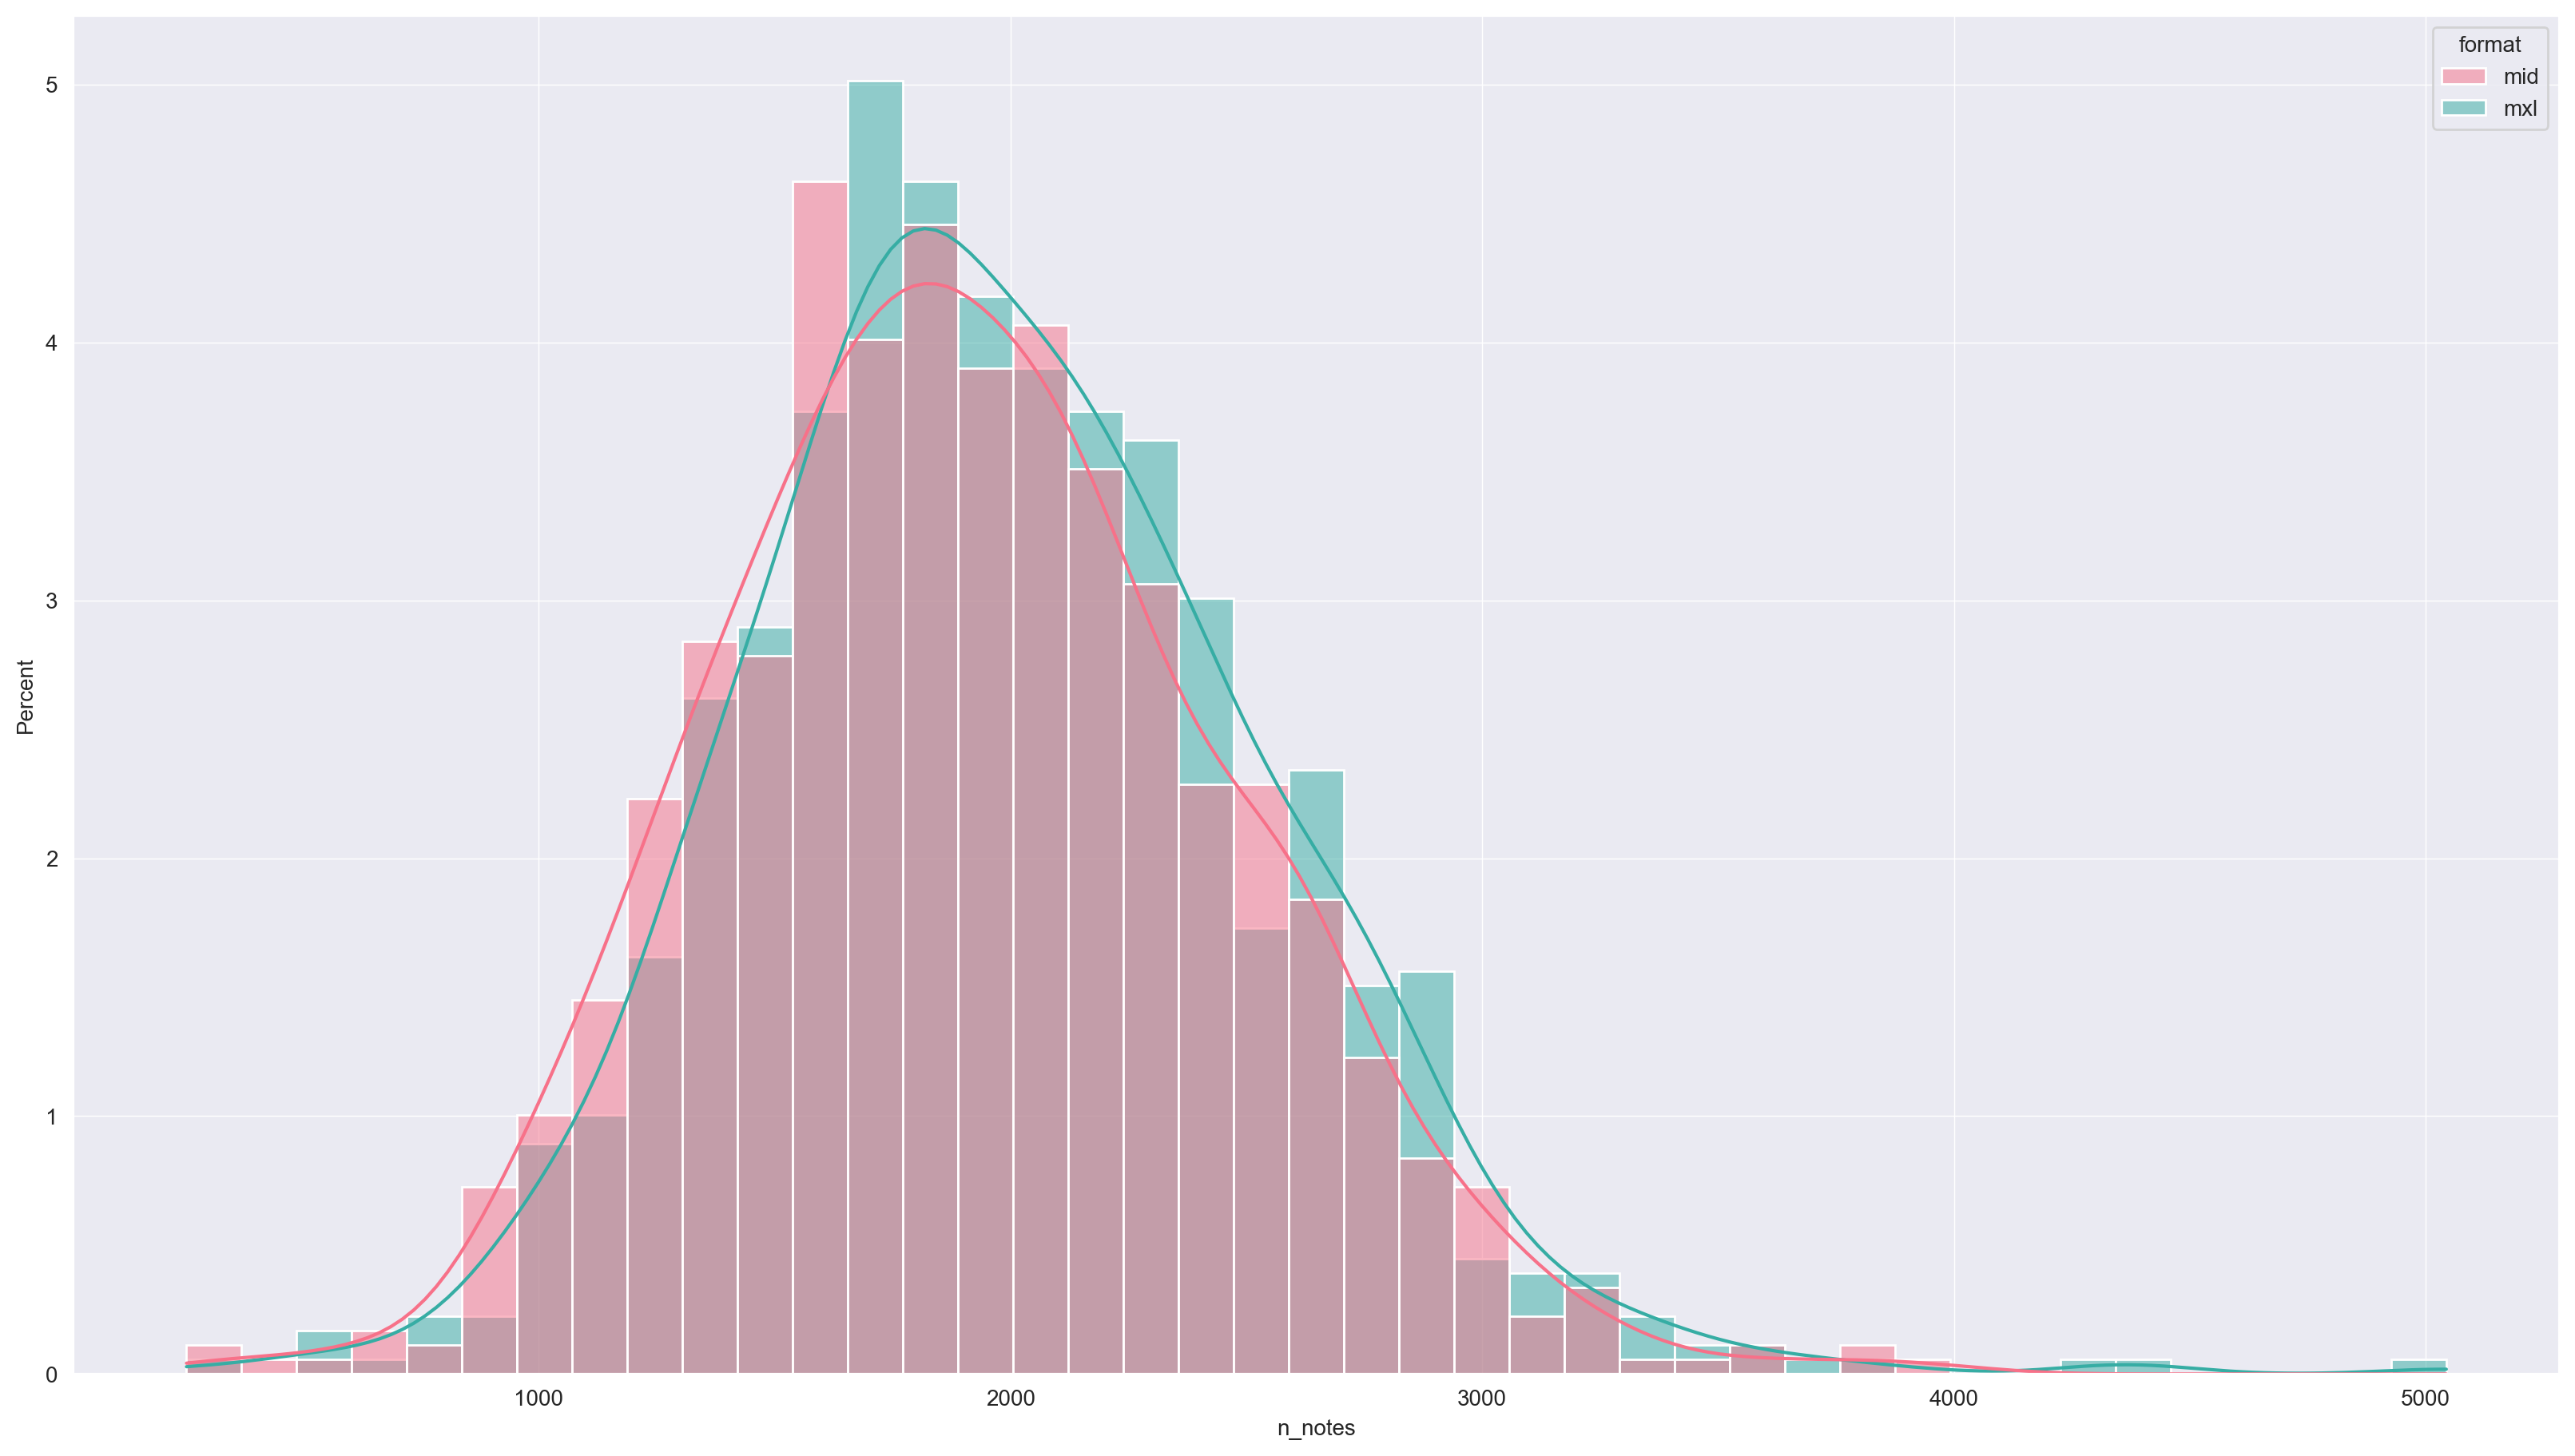

In [5]:
sns.histplot(data=df, x='n_notes', hue='format', stat='percent', kde=True, palette='husl')

